# Background to the Anscombe's Quartet Data Set
The Anscombe's Quartet dataset was first published by Francis Anscombe in 1973  Anscombe was a British statistician who studied maths at Cambridge and worked for the Ministry of Supply during World War 2 on statistical issues relating to quality control. Following the war he returned to Cambridge where he was active in statistical research. In 1955 he moved to moved to America where he worked at both Princeton and Yale. It was at Yale where he developed an interest in statistical computing, where he drew upon his background in sampling and inspections for industrial quality control, the foundations of probability, and analysis of variance. He published a text on the subject "Computing in Statistical Science Through APL". (APL - A Programming Language!)



Anscombe cautioned against mis-diagnosis and the misapplication of computer models, without fully understanding a dataset. To this end he created the Anscombe's Quartet dataset to demonstrate 4 completely different functions which all have the same underlying descriptive statistics (mean, standard deviation, linear regression line etc.), but when plotted - they can be seen to be completely different. At the time that the dataset was developed, many statisticians believed that graphs were imprecise and that descriptive statistics were a better way to fully define what was going on in a set of data. Anscombe disagreed with this and created the quartet to show the benefits of data visualisation believing that both descriptive data and graphs contributed to the understanding of a dataset.

# Plots of the Anscombe's Data Sets
In this section, the quartet of datasets will be analysed using of visual plots. Before analysing the dataset it must first be downloaded. It is widely available on the internet, for this assignment it was downloaded from here. Note that the data set was modified slightly to remove a column which contained some index numbers. The plots will be created using the subplot function of the matplotlib library  for Python. The first step is to import the required libraries.

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Import stats to calculate the properties of the best fit line in the data sets
from scipy import stats


In [14]:
df = pd.read_csv('anscombes.csv')
print(df)

    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89


C:\Users\keith\AppData\Local\Temp\ipykernel_19352\3510249389.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'b-', linestyle='dashed',linewidth=1)


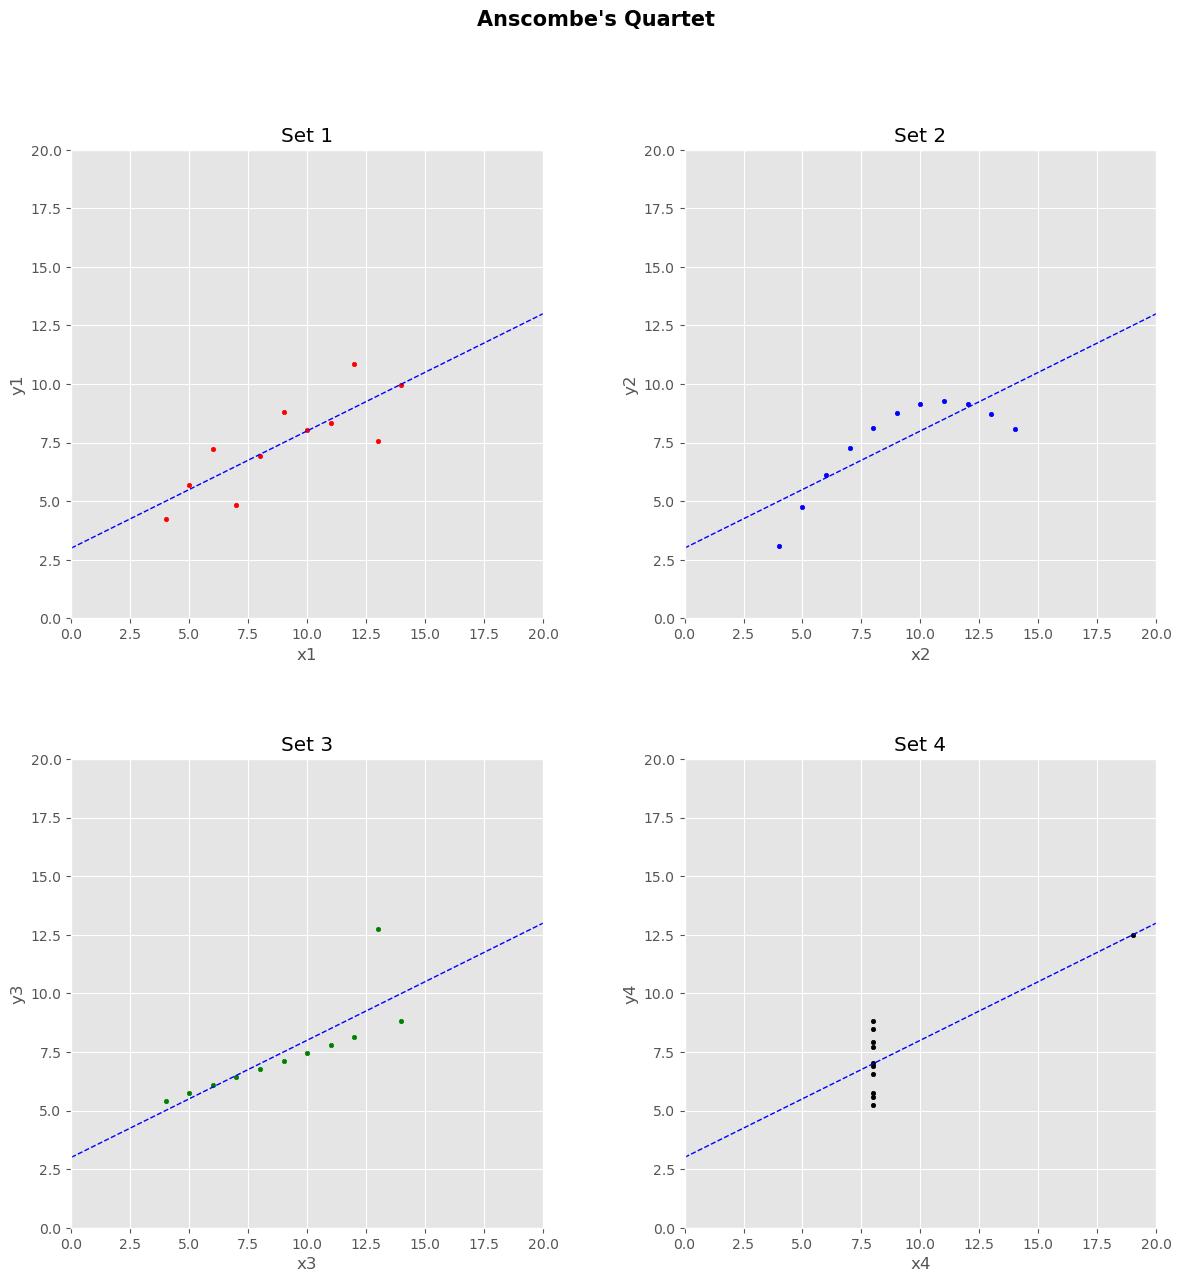

In [15]:
plt.suptitle("Anscombe's Quartet", fontsize=15, fontweight='bold')

plt.style.use('ggplot')


plt.rcParams['figure.figsize'] = [14, 14]


def sub_plot2x2(x, y, pos, title, colour):
    # Plot the set
    plt.subplot(2, 2, pos, xlim=(0,20), ylim=(0,20), xlabel=(x), ylabel=(y), title=title)
    plt.scatter(df.loc[:, x], df.loc[:, y],c=colour, label=title, s=10)
    plt.grid(True)
    # Calculate the linear statistics using stats.linregress()
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, x], df.loc[:, y])
    # Create a range of x values from 0 to 20 (the size of the plot)
    x_vals = np.arange(0,20.1,0.1)
    # Calculate the y values using the slope and intercept calculted
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, 'b-', linestyle='dashed',linewidth=1)

sub_plot2x2('x1', 'y1', 1, 'Set 1', 'red')  
sub_plot2x2('x2', 'y2', 2, 'Set 2', 'blue')
sub_plot2x2('x3', 'y3', 3, 'Set 3', 'green')
sub_plot2x2('x4', 'y4', 4, 'Set 4', 'black')

# Format the spacing between the 4 plots 
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

As demonstrated above - even though the 4 data sets are very different visually, the best fit line for the 4 data sets is exactly the same!

#  Calculation of the Descriptive Statistics
In this section we can take a look at the descriptive statistics of the datasets. There are two differents sets of statistics that need to be considered:

Summary statistics of the columns in the datasets (i.e. summary comparisons of the 'x' and 'y' data between the four sets.
Summaries of the relationships between each of the four 'x-y' pairs
Summary statistics of the columns in the data sets 
When statisticians want to compare sets of similar data (e.g. house prices in different cities), they usually try to get an understanding of the middle of each data set and the spread. Where the middle gives an idea of what value a general data point in the set is likely to have, and the spread gives some indication of how close a data point is likely to be to this middle value. A commonly used measure for the middle of a data set is the mean, and the standard deviation can be used to get a feel for the spread.

In [16]:
df.describe().loc[['count', 'mean', 'std']]


,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579


The mean value of the x column in all 4 data sets is identical (value is 9)
The mean value of the y column in all 4 data sets is correct to 2 decimal places (approx 7.500)
The standard deviation of the x column in all 4 data sets is identical (value is 3.316625)
The standard deviation of the y column is all 4 data sets is similar (approx 2.031)
This is quite extraordinary considering how different each data set looks when plotted!

# Summaries of the relationships between the x-y pairs 
Another way to summarise a dataset is to look at the relationship or corelation between the columns in the dataset. This can be done by using linear regression to determine the slope and y-intercept value of the line which best fits the data. Linear regression is an iterative process used to find the line which has the minimum total deviation from all of the data points in the set. There is a function stats.linregress in the Scipy package that can be used to calulate the slope and y-intercept values for the best fit line. These values are calculated for the each of the 4 data sets below:

In [17]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.loc[:, 'x1'], df.loc[:, 'y1'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df.loc[:, 'x2'], df.loc[:, 'y2'])
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(df.loc[:, 'x3'], df.loc[:, 'y3'])
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(df.loc[:, 'x4'], df.loc[:, 'y4'])

# Print out the equations for the best fit lines for each data set
print("The equation for the best fit line for data set 1 is: y = " + str(round(slope1,2)) + 'x + ' + str(round(intercept1,2)))
print("The equation for the best fit line for data set 2 is: y = " + str(round(slope2,2)) + 'x + ' + str(round(intercept2,2)))
print("The equation for the best fit line for data set 3 is: y = " + str(round(slope3,2)) + 'x + ' + str(round(intercept3,2)))
print("The equation for the best fit line for data set 4 is: y = " + str(round(slope4,2)) + 'x + ' + str(round(intercept4,2)))

The equation for the best fit line for data set 1 is: y = 0.5x + 3.0
The equation for the best fit line for data set 2 is: y = 0.5x + 3.0
The equation for the best fit line for data set 3 is: y = 0.5x + 3.0
The equation for the best fit line for data set 4 is: y = 0.5x + 3.0


So the equations for the best fit lines for all 4 data sets is the exact same! Again this is quite amazing considering how different the 4 data sets look while plotted. There is another interesting statistic to be considered when discussing the Anscombe quartet. This is the co-efficient of determination and known as R-squared. The co-effiecent of determination for a linear regression problem is a measure of the goodness of fit for the model. Statisticians say that data fit a regression model well, if the diferences between the observed data and the model are small. R-squared evaluates the scatter of the data around the regression line. Generally, the larger the value for R-squared, the better the data fit the model. The stats.linregress function has already calculated the R value for each data set, so we can square them and compare them for each set in the quartet.

In [18]:
print("The R-sqaured value of dataset 1 is :" + str(round((r_value1**2),2)))
print("The R-squared value for data set 2 is :" + str(round((r_value2**2),2)))
print("The R-squared value for data set 3 is :" + str(round((r_value3**2),2)))
print("The R-squared value for data set 4 is :" + str(round((r_value4**2),2)))

The R-sqaured value of dataset 1 is :0.67
The R-squared value for data set 2 is :0.67
The R-squared value for data set 3 is :0.67
The R-squared value for data set 4 is :0.67


The R-squared values for the four data sets in the quartet are identical, this means that the the linear regression model used fits all 4 data sets equally well - regarless of how they look when plotted.

# Linear Regression

C:\Users\keith\AppData\Local\Temp\ipykernel_19352\860691360.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'b-', linestyle='dashed',linewidth=1)
C:\Users\keith\AppData\Local\Temp\ipykernel_19352\860691360.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_sim, y_sim, 'b-', linestyle='dashed',linewidth=1)


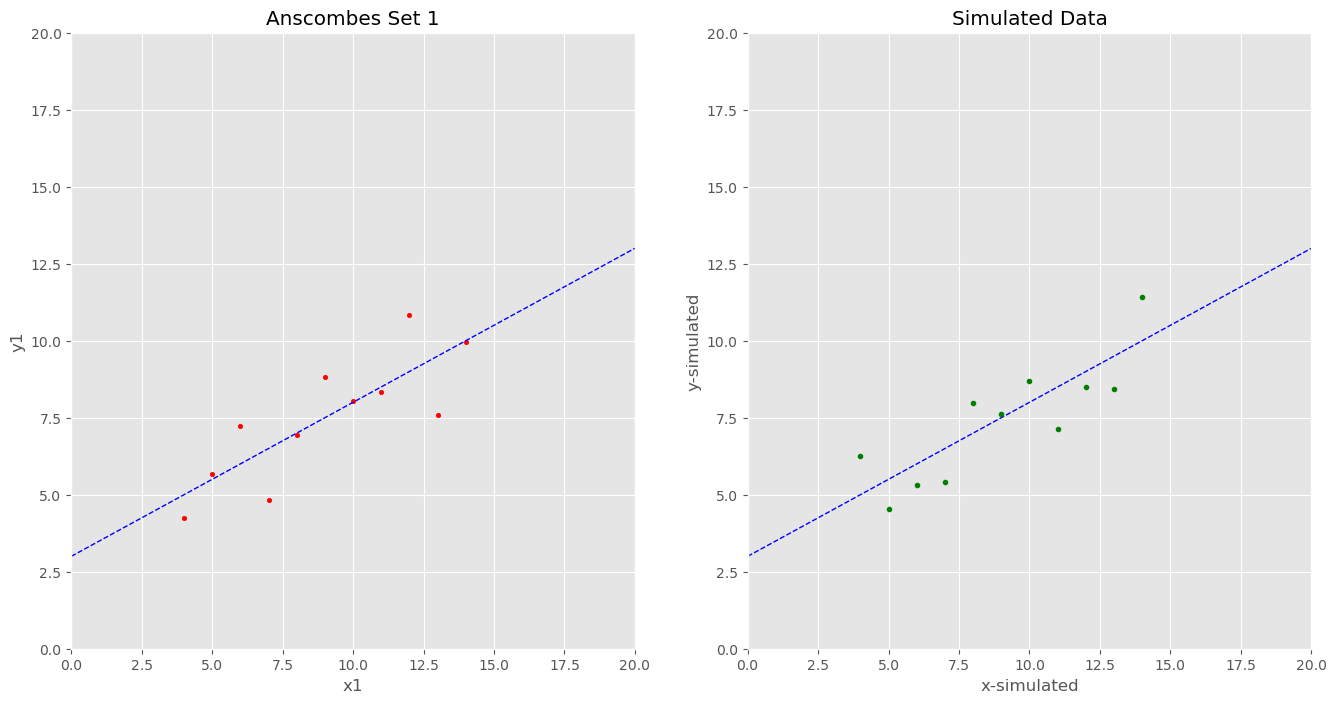

In [20]:
plt.rcParams['figure.figsize'] = [16, 8]

# Plot Set 1 from Anscombes Quartet as a subplot
plt.subplot(1, 2, 1, xlim=(0,20), ylim=(0,20), xlabel=('x1'), ylabel=('y1'), title='Anscombes Set 1')
plt.scatter(df.loc[:, 'x1'], df.loc[:, 'y1'],c='red', label='Anscombes Set 1', s=10)
plt.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, 'x1'], df.loc[:, 'y1'])
# Create a range of x values from 0 to 20 (the size of the plot)
x_vals = np.arange(0,20.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, 'b-', linestyle='dashed',linewidth=1)

# Plot the line y = 0.5x + 3.0, as a sub plot
plt.subplot(1, 2, 2, xlim=(0,20), ylim=(0,20), xlabel=('x-simulated'), ylabel=('y-simulated'), title='Simulated Data')
# Create a range of x values from 0 to 20 (the size of the plot)
x_sim = np.arange(0,20.1,0.1)
# Calculate the y values and plot the line with a blue dashed line
y_sim = 0.5 * x_sim + 3.0
plt.plot(x_sim, y_sim, 'b-', linestyle='dashed',linewidth=1)

# Create a short list of x values in the range 4 - 14
x = np.arange(4,15,1.0)
# Create a list of y values using the best fit line with some simulated normally distributed noise
y = [0.5*i + 3.0 + np.random.normal() for i in x]
plt.plot(x,y, 'g.')

The plot above on the left represents a plot of the data from Anscombes Data Set 1. The set on the right is a plot of the best fit line taken from Anscombes data set, and I have used this line plus some normally distributed random noise to simulate how well linear regression works in the case where the data are nomally distributed around the best fit line. Visually, we can see that the two plots are very similar and have much more in common with each other than any of the other data sets in Anscombes quartet. We can use the stats.lingress() function to determine what the best fit line is for the simulated data, and then compare it to the expected value (y = 0.5x + 3.0).

In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("The best fit line for the simulated data is: y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2)))

The best fit line for the simulated data is: y = 0.5x + 2.88


# Polynomial Regression
Another interesting discussion point from the quartet is the importance on visualising the data to determine if there is actually a linear relationship between the variables, rather than just assuming it is so and estimating the best fit line for the data. In some cases, such as in set 2 of Anscombes quartet, the relationship might be better described by a higher order relationship such as a quadratic or cubic function.

C:\Users\keith\AppData\Local\Temp\ipykernel_19352\1781290814.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_poly, y_poly, 'b-', linestyle='dashed',linewidth=1)


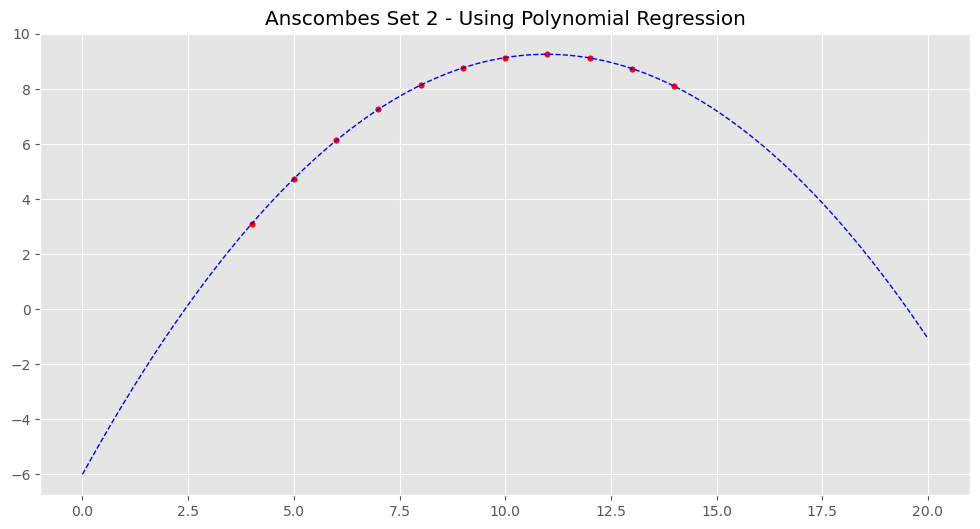

In [23]:
plt.rcParams['figure.figsize'] = [12, 6]
poly = np.polyfit(df.loc[:, 'x2'], df.loc[:, 'y2'], 2)
x_poly = np.arange(0,20.1,0.1)
y_poly = poly[0]*(x_poly**2) + poly[1]*(x_poly)+poly[2]
plt.plot(x_poly, y_poly, 'b-', linestyle='dashed',linewidth=1)

# plot the Anscombes set 2 data points for comparison
plt.scatter(df.loc[:, 'x2'], df.loc[:, 'y2'],c='red', label='Anscombes Set 2', s=15)
plt.title("Anscombes Set 2 - Using Polynomial Regression")
plt.show()

The plot above shows that rather than having a linear relationship, there is a quadratic relationship between x and y, in data set 2. In other cicumstances trial and error may be required using the numpy.polyfit() function for higher and higher order functions to determine the relationship. The quadratic co-efficients are calculated by the polyfit function and can be displyed as follows:

In [24]:
print("The x-squared coefficient is: " + str(round(poly[0],2)))
print("The x coefficient is: " + str(round(poly[1],2)))
print("The y intercept is: " + str(round(poly[2],2)))

The x-squared coefficient is: -0.13
The x coefficient is: 2.78
The y intercept is: -6.0
